# This is to show the math used in Neural Networks with examples

First set up the matrix that we're going to use and visualise them

In [3]:
    from __future__ import absolute_import, division, print_function, unicode_literals
    from numpy import exp, array, random, dot
    
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]])
    
    random.seed(13)
    # We model a single neuron, with 3 input connections and 1 output connection.
    # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
    # and mean 0
    synaptic_weights = 2 * random.random((3, 1)) - 1
    
    print('synaptic weights')
    print(synaptic_weights)
    
    #the trailing .T means you transpose or rotate the matrix along an axes so if tall and skinny, 
    #becomes short and wide or vice versa.
    training_set_outputs_transposed = array([[0, 1, 1, 0]]).T
    print('input matrix')
    print(training_set_inputs)
    print('output matrix 1 x 4')
    print(training_set_outputs)
    print('output matrix transposed')
    print(training_set_outputs_transposed)
    

synaptic weights
[[ 0.55540482]
 [-0.52491756]
 [ 0.64855707]]
input matrix
[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output matrix 1 x 4
[[0 1 1 0]]
output matrix transposed
[[0]
 [1]
 [1]
 [0]]


Define two functions to give results of a sigmoid function

and the derivative of the sigmoid

In [4]:
def sigmoid(x):
        return 1 / (1 + exp(-x))
def sigmoid_derivative(x):
        return x * (1 - x)

Show both functions in mat plot

Sigmoid converts large values into a range of probability between 0 and 1

sigmoid derivative tells you the rate of change for the sigmoid value passed to it.


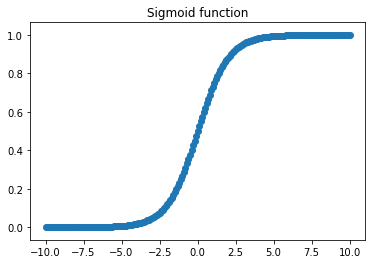

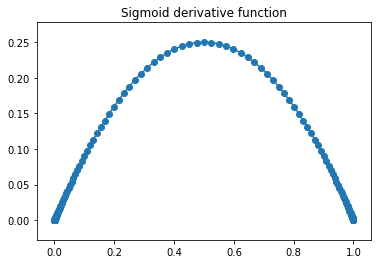

In [5]:
import matplotlib.pyplot as plt

def seq(start, stop, step=1):
    n = int(round((stop - start)/float(step)))
    if n > 1:
        return([start + step*i for i in range(n+1)])
    else:
        return([])

listplusminus1 = seq(-10, 10, 0.1)
sigmoidlist = seq(-10, 10, 0.1)
sigmoid_diriv = seq(-10, 10, 0.1)


for i,value in enumerate(sigmoidlist):
    sigmoidlist[i] = sigmoid(value)

for i,value in enumerate(sigmoid_diriv):
    sigmoid_diriv[i] = sigmoid_derivative(sigmoidlist[i])
    #sigmoid_diriv[i] = sigmoid_derivative(value)
    

    
plt.title('Sigmoid function')    
plt.scatter(listplusminus1, sigmoidlist)
plt.plot(listplusminus1, sigmoidlist)
plt.show()

plt.title('Sigmoid derivative function')    
plt.scatter(sigmoidlist, sigmoid_diriv)
plt.plot(sigmoidlist, sigmoid_diriv)
plt.show()




Try using the combination of your synaptic weights with the inputs to see if you get close to the outputs the training data would give you.  This is the synapse actually 'thinking'

In [6]:

#stage 1 work out the dot product of your inputs and weights
dotproduct = dot(training_set_inputs, synaptic_weights)
print(training_set_inputs)
print(synaptic_weights)
print('dot product of training inputs and synaptic weights')
print(dotproduct)
#then take the output and put it through a sigmoid fucntion to push the values into the 0 to 1 range
print('now find its sigmoid')
sigmoid_of_dot_product = sigmoid(dotproduct)
print(sigmoid_of_dot_product)

[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
[[ 0.55540482]
 [-0.52491756]
 [ 0.64855707]]
dot product of training inputs and synaptic weights
[[ 0.64855707]
 [ 0.67904433]
 [ 1.20396189]
 [ 0.12363951]]
now find its sigmoid
[[ 0.65668523]
 [ 0.66352537]
 [ 0.76922883]
 [ 0.53087056]]


OK so this used the synaptic weights matrix multiplied with the inputs to get output values. As we want these to be either zeros or ones we need to run them through a sigmoid function to give probability that it is one or the other.  Greater than .5 would probably be a 1 and less than that be a zero.  Confidence grows as the number rises.

In [7]:
print('what we wanted to get')
print(training_set_outputs_transposed)
print('what we got after the synapse had its think')
print(sigmoid_of_dot_product)

what we wanted to get
[[0]
 [1]
 [1]
 [0]]
what we got after the synapse had its think
[[ 0.65668523]
 [ 0.66352537]
 [ 0.76922883]
 [ 0.53087056]]


In [9]:
error = training_set_outputs_transposed - sigmoid_of_dot_product
print('error or cost of the current function')
print(error)
print('find the adjustment you need to make by multiplying the error by the sigmoid_derivative(sigmoid_of_dot_product)')
print(sigmoid_derivative(sigmoid_of_dot_product))
print('which you find the dot product with the Training inputs transposed')
print(training_set_inputs.T)
print('so guess at what adjustment we need to make now becomes')
adjustment = dot(training_set_inputs.T, error * sigmoid_derivative(sigmoid_of_dot_product))
print(adjustment)


error or cost of the current function
[[-0.65668523]
 [ 0.33647463]
 [ 0.23077117]
 [-0.53087056]]
find the adjustment you need to make by multiplying the error by the sigmoid_derivative(sigmoid_of_dot_product)
[[ 0.22544974]
 [ 0.22325945]
 [ 0.17751584]
 [ 0.24904701]]
which you find the dot product with the Training inputs transposed
[[0 1 1 0]
 [0 1 0 1]
 [1 1 1 1]]
so guess at what adjustment we need to make now becomes
[[ 0.11608668]
 [-0.05709058]
 [-0.16417456]]


In [10]:
print('so after 1st round of training we have synaptic weights change from')
print(synaptic_weights)
print('to')
synaptic_weights += adjustment
print(synaptic_weights)

so after 1st round of training we have synaptic weights change from
[[ 0.55540482]
 [-0.52491756]
 [ 0.64855707]]
to
[[ 0.6714915 ]
 [-0.58200814]
 [ 0.48438251]]


In [12]:
#now train it with 10000 iterations
number_of_training_iterations  = 10000
for iteration in range(number_of_training_iterations):
    #step 1 use current weights to guess, this is it thinking
    dotproduct = dot(training_set_inputs, synaptic_weights)
    sigmoid_of_dot_product = sigmoid(dotproduct)
    #step 2 work out error
    error = training_set_outputs_transposed - sigmoid_of_dot_product
    #step 3 work out adjustment
    adjustment = dot(training_set_inputs.T, error * sigmoid_derivative(sigmoid_of_dot_product))
    #step 4 apply it to your weights
    synaptic_weights += adjustment
#test it 
test_data = array([1, 0, 0])
dotproduct = dot(test_data, synaptic_weights)
sigmoid_of_dot_product = sigmoid(dotproduct)
print('output')
print(sigmoid_of_dot_product)


output
[ 0.99993705]


 this is the training data and the expected outputs
 [0 0 1] = 0
 [1 1 1] = 1
 [1 0 1] = 1
 [0 1 1] = 0
 
 so for 
  1 0 0  = .99997 that's a very high confidence 1
  
  
 

In [13]:
test_data = array([0, 0, 1])
dotproduct = dot(test_data, synaptic_weights)
sigmoid_of_dot_product = sigmoid(dotproduct)
print('expect 0 from this one')
print(sigmoid_of_dot_product)

expect 0 from this one
[ 0.00966974]


In [14]:
test_data = array([0, 0, 0])
dotproduct = dot(test_data, synaptic_weights)
sigmoid_of_dot_product = sigmoid(dotproduct)
print('not sure what to expect from this one 0 0 0')
print(sigmoid_of_dot_product)

not sure what to expect from this one 0 0 0
[ 0.5]


Looks like the single neuron is as stumped as I was.